# Stanford Quantitative Sciences Unit Test
**[Biostatistician 1] Candidate : Hyunseo Joelle  Cho**

`Study Background, Dataset Description, Tasks(1-4), and the dataset used below were given by QSU`

**STUDY BACKGROUND**

> An investigator is interested in knowing whether a **novel diet can help women lose weight.** She conducts a randomized clinical trial over a period of 5 months to test whether the diet works. Five hundred women are randomized to receive the new diet (treatment) and five hundred are randomized to continue with their own diet (control). Weight in pounds is recorded at baseline (visit number 1) and at the beginning of every subsequent month for the next 4 months.  **The investigator wants to know whether the new diet will affect one’s weight over time differently for those on the new diet versus those not receiving the new diet.**


**DATASET DESCRIPTION**

> There are two data sets describing the results.  They are included as comma-delimited files.  The first, dataset1.csv, contains three variables: theid (the patient’s unique identifier), treatment (an indicator for whether the patient received the new diet (1) or not (0)), and age (the patient’s age in years at study entry).  The second data set, dataobserved.csv, contains three variables: id (the patient’s unique identifier), outcome (the patient’s weight in pounds recorded at a particular visit), and visitnumber (the visit number).

## <mark>Assessing the Impact of a Novel Diet on Weight Loss in Women:</mark>
## <mark> A Randomized Clinical Trial with Varying Treatment Effects over Time </mark>

### [Brief Explanation of Joelle's Study below]

### `Background`
Based on the study background and dataset description, I decided to conduct **Mixed Linear Model** to test whether treatment has an impact on weight and test if the treatment effects to vary over time. 

Throughout exploratory data analysis steps, I could confirm that 'age' variable is normally distributed otherwise the 'outcome(weight)' is bimodal. Since Mixed Linear Model is appropriate when the response variable(outcome) is noramlly distributed, I tried to transform the outcome(weight) using two different methods(Box-Cox, Yeo-Johnson). Even after the transformation, the outcome(weight) variable were still not normally distributed. So I decided to investigate the relationship between the response variable and the predictor variables. I visualized the scattor plot and calculated correlation coefficients to quantify the strength and direction of the relationship between Response Variable and Predictor Variable. I confirmed 


### `Hypothesis`
The hypotheses for the mixed effects linear regression model with age as a predictor variable are:

**$H_0$:** There is no significant relationship between the outcome variable and the predictor variables (treatment, age, visit number, and their interaction), after accounting for the variation due to the random effects.

**$H_A$:** There is a significant relationship between the outcome variable and the predictor variables (treatment, age, visit number, and their interaction), after accounting for the variation due to the random effects.

**The hypotheses are  symbolically represented as:**

Null hypothesis: $$H_0: \beta_1 = \beta_2 = \beta_3 = \beta_4 = 0$$

 Alternative hypothesis: $$H_1: \beta_1 \neq 0 \quad \text{or} \quad \beta_2 \neq 0 \quad \text{or} \quad \beta_3 \neq 0 \quad \text{or} \quad \beta_4 \neq 0$$



### `Linear Mixed Model`
**The model is symbolically represented as:**

$$\text{outcome} = \beta_0 + \beta_1 (\text{treatment}) + \beta_2 (\text{age}) + \beta_3 (\text{visitnumber}) + \beta_4 (\text{treatment}:\text{visitnumber}) + u_{0i} + e_{ij}$$

where $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, and $\beta_4$ are the fixed effects coefficients, $u_{0i}$ is the random effect of the $i$-th group, and $e_{ij}$ is the residual error of the $j$-th observation in the $i$-th group.

- $\beta_0$: the intercept, or the expected outcome when all predictor variables are zero.
- $\beta_1$: the effect of treatment on the outcome, holding other variables constant.
- $\beta_2$: the effect of age on the outcome, holding other variables constant.
- $\beta_3$: the effect of visit number on the outcome, holding other variables constant.
- $\beta_4$: the interaction effect between treatment and visit number on the outcome, holding other variables constant.

### `Result`

- The model was fit using the maximum likelihood method and was estimated using the 'mixedlm' function from the 'statsmodels' library in Python. The model output includes the estimated coefficients and standard errors, along with the p-values and 95% confidence intervals for each predictor variable

- The results of our analysis suggest that there is a significant treatment effect (p-value = 0.011). Specifically, individuals in the treatment group had, on average, 0.89 units higher outcome scores compared to individuals in the control group, after adjusting for age, visit number, and their interaction (95% CI: 0.20 to 1.57). There was also a significant effect of visit number (p-value < 0.001), with an average increase of 3.998 units in outcome score per additional visit. However, there was no significant effect of age (p-value = 0.765). 

- Furthermore, we found a significant interaction between treatment and visit number (p-value < 0.001), indicating that the treatment effect on outcome score varied depending on the visit number. Specifically, the treatment group showed a larger decrease in outcome score over time compared to the control group. 

- Overall, these results suggest that the treatment has a significant effect on the outcome score and that this effect varies over time. Specifically, the treatment group showed a larger decrease in outcome score over time compared to the control group.

In [1]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns ; sns.set()
import sklearn as sk


from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import yeojohnson
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read dataset1.csv as df1, renamed the column, and the information of df1

df1 = pd.read_csv("dataset1.csv")
df1.rename(columns={"theid": "id"}, inplace = True) # changed the column name theid to id 
df1.info() 

df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   treatment  1000 non-null   int64  
 2   age        1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,id,treatment,age
0,1,1,61.899478
1,2,1,62.813407
2,3,1,65.009085
3,4,1,60.259313
4,5,1,66.229078


In [3]:
# descriptive statistics or df1
df1[['treatment','age']].describe()

,treatment,age
count,1000.00000,1000.000000
mean,0.50000,60.069119
std,0.50025,3.880956
min,0.00000,48.423499
25%,0.00000,57.421973
50%,0.50000,59.989469
75%,1.00000,62.744478
max,1.00000,74.373335


In [4]:
# read dataobserved.csv as df2 and the information of df2
df2 = pd.read_csv("dataobserved.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4499 non-null   int64  
 1   outcome      4499 non-null   float64
 2   visitnumber  4499 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 105.6 KB


In [5]:
df2.head()

,id,outcome,visitnumber
0,1,149.125460,1
1,1,137.229366,4
2,1,133.096258,5
3,2,160.854708,1
4,2,155.566215,2


In [6]:
# descriptive statistics or df2 
df2[['outcome','visitnumber']].describe()

,outcome,visitnumber
count,4499.000000,4499.000000
mean,160.345720,2.992665
std,14.020097,1.413172
min,124.267160,1.000000
25%,148.690255,2.000000
50%,160.348467,3.000000
75%,171.932352,4.000000
max,193.033548,5.000000


### Check the Shape of data

In [7]:
# Double Check the Shape of dataset 

r1, c1 = df1.shape
r2, c2 = df2.shape

print("[dataset1.csv] with consited with {} numbers of row and {} numbers of columns.".format(r1,c1))
print("[dataobserved.csv] with consited with {} numbers of row and {} numbers of columns.".format(r2,c2))

[dataset1.csv] with consited with 1000 numbers of row and 3 numbers of columns.
[dataobserved.csv] with consited with 4499 numbers of row and 3 numbers of columns.


### Check Duplicates 

In [8]:
# There are no missing(null) values in both datasets 
# Check if there's any duplicated rows 

print("There are {} numbers of duplicated rows in the [dataset1.csv]".format(df1.duplicated().sum()))
print("There are {} numbers of duplicated rows in the [dataobserved.csv]".format(df2.duplicated().sum()))

There are 0 numbers of duplicated rows in the [dataset1.csv]
There are 0 numbers of duplicated rows in the [dataobserved.csv]


## Exploratory Data Analysis -- 1) 'age' variable

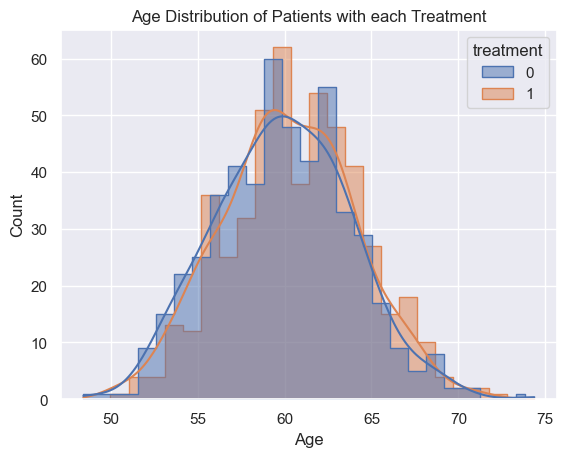

In [9]:
sns.histplot(data = df1, x ='age', hue='treatment', multiple='dodge', alpha=0.5, kde=True, element="step")
plt.xlabel("Age")
plt.title("Age Distribution of Patients with each Treatment")
plt.xticks()
plt.show()

### Conduct shapiro-wilk test to see if the age of patients are normally distributed

In [10]:
# function which shows if the data is normally distributed or not, based on shapiro test
# Function: "norm_dist"
# parameters: data
# Assess if the data is normally distributed using Shapiro-Wilk Test
# outcome: print the statement if the data is Normally Distributed or not. 

def norm_dist(data):
    stat, p = shapiro(data)
    alpha = 0.05
    if p > alpha:
        print('By Shapiro test, Test Statistics is %.3f and the p-value is %.3f.\n So I could confirm that the data is Normally Distributed'% (stat, p))
    else:
        print('By Shapiro test, Test Statistics is %.3f and the p-value is %.3f.\n So I could confirm that the data is NOT normally distributed'% (stat, p))

# see if the 'age' is normally distributed 
norm_dist(df1['age'])

By Shapiro test, Test Statistics is 0.998 and the p-value is 0.533.
 So I could confirm that the data is Normally Distributed


## <div class="alert alert-success"> TASK 1 </div>

> **1) Create an analytic data set by appropriately merging the two files, and provide code for how you arrived at your analytic data set.** 


In [11]:
# merged two dataframes on 'id'
analytic_data = df2.merge(df1, on='id')
analytic_data.head(10)
#analytic_data.to_csv('analytic_data.csv', index=False)

,id,outcome,visitnumber,treatment,age
0,1,149.125460,1,1,61.899478
1,1,137.229366,4,1,61.899478
2,1,133.096258,5,1,61.899478
3,2,160.854708,1,1,62.813407
4,2,155.566215,2,1,62.813407
5,2,151.740785,3,1,62.813407
6,2,146.467257,4,1,62.813407
7,2,143.062480,5,1,62.813407
8,3,161.082812,1,1,65.009085
9,3,157.287549,2,1,65.009085


In [12]:
analytic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4499 entries, 0 to 4498
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4499 non-null   int64  
 1   outcome      4499 non-null   float64
 2   visitnumber  4499 non-null   int64  
 3   treatment    4499 non-null   int64  
 4   age          4499 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 210.9 KB


In [13]:
analytic_data[['outcome','visitnumber','treatment','age']].describe()

,outcome,visitnumber,treatment,age
count,4499.000000,4499.000000,4499.000000,4499.000000
mean,160.345720,2.992665,0.497444,60.079728
std,14.020097,1.413172,0.500049,3.875807
min,124.267160,1.000000,0.000000,48.423499
25%,148.690255,2.000000,0.000000,57.443508
50%,160.348467,3.000000,0.000000,60.002673
75%,171.932352,4.000000,1.000000,62.761074
max,193.033548,5.000000,1.000000,74.373335


### Divide the analytic_data into two dataframes(trt vs no_trt) based on treatment

In [14]:
# Divided in to two dataframes trt = received diet(1) , no_trt = did not receive diet(0)

trt = analytic_data[analytic_data['treatment'] ==1]
no_trt = analytic_data[analytic_data['treatment'] == 0]

trt.shape, no_trt.shape, type(trt)

((2238, 5), (2261, 5), pandas.core.frame.DataFrame)

In [15]:
trt[['outcome','age']].describe()

,outcome,age
count,2238.000000,2238.000000
mean,148.679651,60.201972
std,7.897116,3.844228
min,124.267160,50.065646
25%,143.001426,57.754079
50%,148.626043,60.060455
75%,154.236521,62.859252
max,176.673220,71.577963


In [16]:
no_trt[['outcome','age']].describe()

,outcome,age
count,2261.000000,2261.000000
mean,171.893117,59.958727
std,7.830025,3.903895
min,150.187149,48.423499
25%,166.123486,57.339810
50%,171.863386,59.912920
75%,177.608628,62.620037
max,193.033548,74.373335


## Exploratory Data Analysis - 2) Weights('outcome') variable

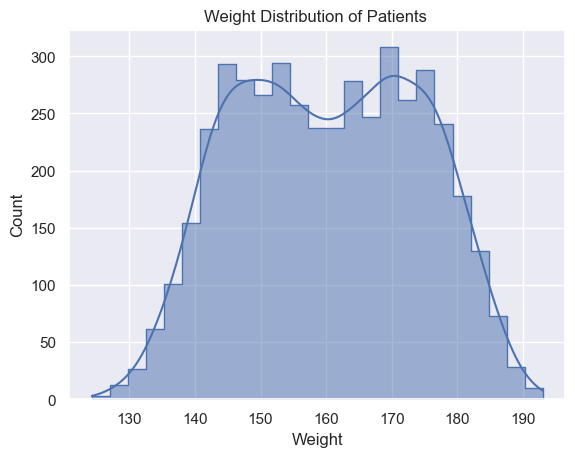

In [17]:
sns.histplot(data = analytic_data, x ='outcome', multiple='dodge', alpha=0.5, kde=True, element="step")
plt.xlabel("Weight")
plt.title("Weight Distribution of Patients ")
plt.xticks()
plt.show()

In [18]:
# Check if the Weight is normally distributed
norm_dist(analytic_data['outcome'])

By Shapiro test, Test Statistics is 0.977 and the p-value is 0.000.
 So I could confirm that the data is NOT normally distributed


 > Since the **outcome(weight) in the whole "analytic_data" is not normally distributed**, I decided to look for distribution of **each weight variable for each 'visitnumber' group**

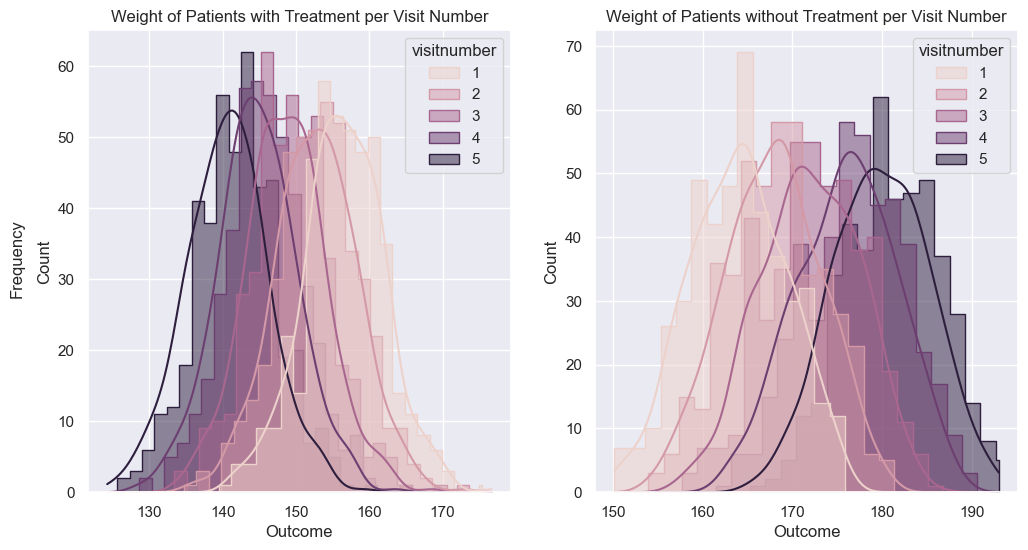

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the first histogram in the left subplot
sns.histplot(data=trt, x='outcome', hue='visitnumber', multiple='dodge', alpha=0.5, kde=True, element="step", ax=ax1)
ax1.set_xlabel("Outcome")
ax1.set_title("Weight of Patients with Treatment per Visit Number")

# Plot the second histogram in the right subplot
sns.histplot(data=no_trt, x='outcome', hue='visitnumber', multiple='dodge', alpha=0.5, kde=True, element="step", ax=ax2)
ax2.set_xlabel("Outcome")
ax2.set_title("Weight of Patients without Treatment per Visit Number")


# Add a common y label
fig.text(0.06, 0.5, 'Frequency', va='center', rotation='vertical')

# Show the plot
plt.show()

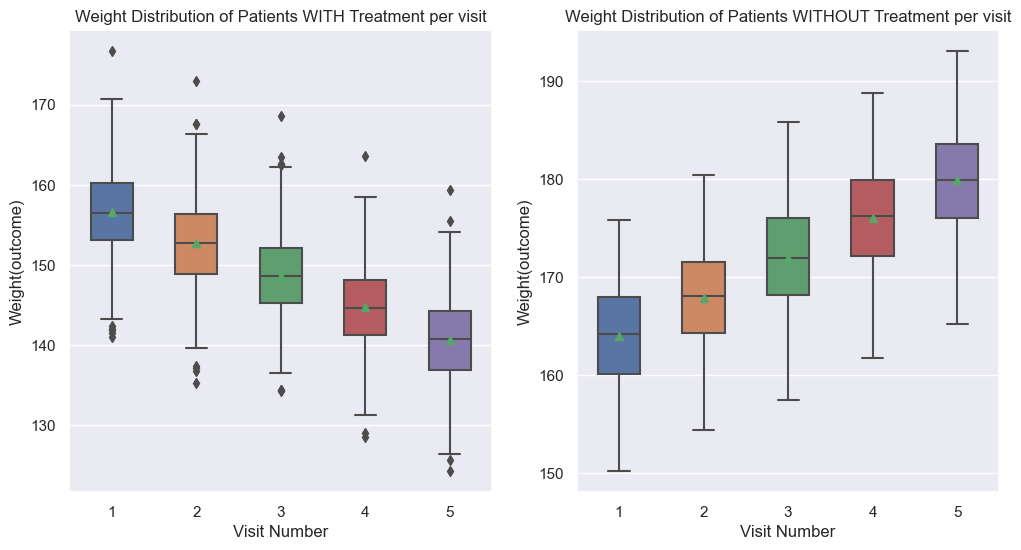

In [20]:
# weight per each visit with treatment 
t = []
for i in range(1,6):
    t.append(trt[trt['visitnumber']==i])

# weight per each visit without treatment 
nt = []
for i in range(1,6):
    nt.append(no_trt[no_trt['visitnumber']==i])

# plot boxplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

sns.boxplot(data=[t[i]['outcome'] for i in range(5)], width=0.5, ax=ax1, showmeans=True)
ax1.set_xlabel("Visit Number")
ax1.set_ylabel("Weight(outcome)")
ax1.set_xticks(ticks=range(5), labels=['1', '2', '3', '4', '5'])
ax1.set_title("Weight Distribution of Patients WITH Treatment per visit")

sns.boxplot(data=[nt[i]['outcome'] for i in range(5)], width=0.5,ax=ax2, showmeans=True)
ax2.set_xlabel("Visit Number")
ax2.set_ylabel("Weight(outcome)")
ax2.set_xticks(ticks=range(5), labels=['1', '2', '3', '4', '5'])
ax2.set_title("Weight Distribution of Patients WITHOUT Treatment per visit")

plt.show()


> Check if each group's weight is normally distributed using Shaprio-Wilk Test

In [21]:
## Conduct Shapiro test to check if each group's weight is normally distributed 

for treat in [1, 0]:
    prefix = 't' if treat == 1 else 'nt'
    
    for visit in range(1, 6):
        print(f"\n# {prefix}{visit} : visitnumber = {visit} & treatment = {treat} ")
        data = analytic_data[(analytic_data['visitnumber']==visit) & (analytic_data['treatment']==treat)]
        if len(data) >= 3:
            norm_dist(data['outcome'])
        else:
            break


# t1 : visitnumber = 1 & treatment = 1 
By Shapiro test, Test Statistics is 0.996 and the p-value is 0.288.
 So I could confirm that the data is Normally Distributed

# t2 : visitnumber = 2 & treatment = 1 
By Shapiro test, Test Statistics is 0.998 and the p-value is 0.924.
 So I could confirm that the data is Normally Distributed

# t3 : visitnumber = 3 & treatment = 1 
By Shapiro test, Test Statistics is 0.995 and the p-value is 0.219.
 So I could confirm that the data is Normally Distributed

# t4 : visitnumber = 4 & treatment = 1 
By Shapiro test, Test Statistics is 0.998 and the p-value is 0.818.
 So I could confirm that the data is Normally Distributed

# t5 : visitnumber = 5 & treatment = 1 
By Shapiro test, Test Statistics is 0.998 and the p-value is 0.876.
 So I could confirm that the data is Normally Distributed

# nt1 : visitnumber = 1 & treatment = 0 
By Shapiro test, Test Statistics is 0.993 and the p-value is 0.022.
 So I could confirm that the data is NOT normally distr

> According to Shapiro-Wilk Test the outcome(weight) is not normally distributed so I decided to **transform the outcome(weight)** using two methods(**box-cox method, yeo-johnson method**)

## Transform outcome(weight) data  
### - Transform 1. Box-Cox Method

In [22]:
boxcox_transformed, lambda_ = stats.boxcox(analytic_data['outcome'])

# After transformation, check if the transformed data is normally distributed
norm_dist(boxcox_transformed)

By Shapiro test, Test Statistics is 0.977 and the p-value is 0.000.
 So I could confirm that the data is NOT normally distributed



### - Transform 2. Yeo-Johnson Method

In [23]:
yj_transformed, _ = yeojohnson(analytic_data['outcome'])
# After transformation, check if the transformed data is normally distributed
norm_dist(yj_transformed)

By Shapiro test, Test Statistics is 0.977 and the p-value is 0.000.
 So I could confirm that the data is NOT normally distributed


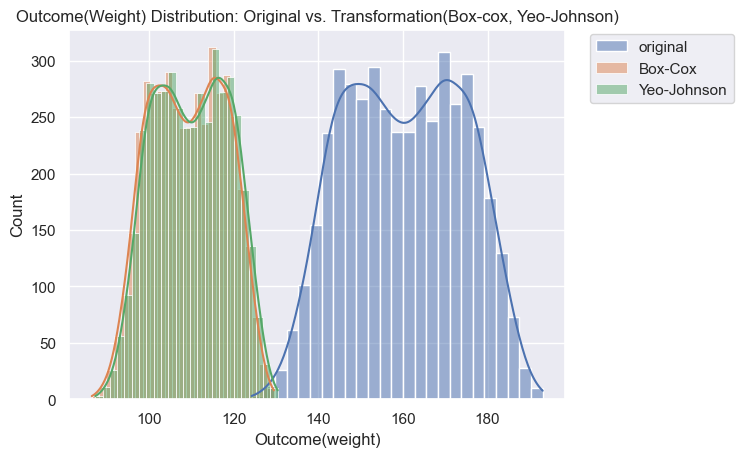

In [24]:
# Visualize the distributions of Original Data and Transformed Data
sns.histplot(analytic_data['outcome'], label='original',kde = True)
sns.histplot(boxcox_transformed, label = 'Box-Cox',kde = True)
sns.histplot(yj_transformed, label = 'Yeo-Johnson',kde = True)
plt.title("Outcome(Weight) Distribution: Original vs. Transformation(Box-cox, Yeo-Johnson)")
plt.legend(loc=(1.05,0.8))
plt.xlabel('Outcome(weight)')
plt.show()

## Relationship between the Response Variable vs. Predictor Variable 

> Even after tranformation using box-cox and yeo-johnson methods, outcome(weight) was still not normally distributed. So I decided to investigate the relationship between the response variable and the predictor variables. I visualized the scattor plot and calculated correlation coefficients to quantify the strength and direction of the relationship between Response Variable and Predictor Variable. 


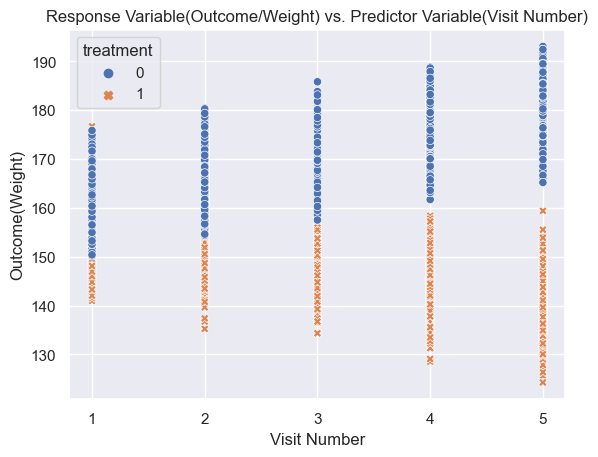

In [25]:
# Create scatterplot of response variable vs. predictor variable
sns.scatterplot(x='visitnumber', y='outcome', data=analytic_data, hue ='treatment', style = 'treatment')
plt.title("Response Variable(Outcome/Weight) vs. Predictor Variable(Visit Number)")
plt.xlabel("Visit Number")
plt.ylabel("Outcome(Weight)")
plt.xticks([1,2,3,4,5])
plt.show()

In [26]:
# Calculate correlation coefficient
corr_coeff_trt = np.corrcoef(trt["visitnumber"], trt["outcome"])[0,1]
print("[With Treatment] Correlation coefficient of visitnumber and outcome(weight): {}".format(round(corr_coeff_trt,3)))

corr_coeff_no_trt = np.corrcoef(no_trt["visitnumber"], no_trt["outcome"])[0,1]
print("[No Treatment] Correlation coefficient of visitnumber and outcome(weight): {}".format(round(corr_coeff_no_trt,3)))

[With Treatment] Correlation coefficient of visitnumber and outcome(weight): -0.714
[No Treatment] Correlation coefficient of visitnumber and outcome(weight): 0.723


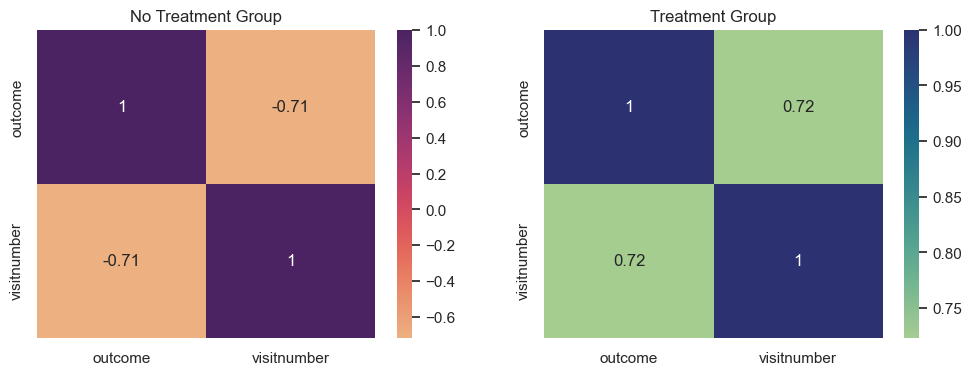

In [27]:
# Visualize the correlation using heatmap

corr_trt = trt[['outcome','visitnumber']].corr()
corr_notrt = no_trt[['outcome','visitnumber']].corr()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.heatmap(corr_trt, annot= True , ax =ax1, cmap ="flare")
ax1.set_title("No Treatment Group")

sns.heatmap(corr_notrt, annot= True, ax=ax2,cmap ="crest")
ax2.set_title("Treatment Group")

plt.show()

> Correlation coefficient of 0.7 or -0.7 suggests a strong relationship between the response and predictor variables, so I decided to conduct Mixed linear Model for the study 

## Equal Variation Test - LEVENE
> I confirmed that the variance of two outcome(weight) groups were not significantly different based on the box plots above, but I conducted to levene test to make sure the each group's variance are not significantly different.

In [28]:
# Function: "equal_var"
# parameters: g1, g2
# Assess the equality of variances for two or more groups of data.
# outcome: print the statement if two groups (g1,g2)'s variance is significantly different or not. 

def equal_var(g1, g2):
    stat, pval = levene(g1, g2)
    alpha = 0.05 
    if pval < alpha:
        print("The variances of two groups are significantly different\n")
    else:
        print("The variances of two groups are NOT significantly different\n")

In [29]:
print("**'Outcome(weight)' variable between treatment and control group **")
equal_var(trt['outcome'],no_trt['outcome'])

print("**'Age' variable between treatment and control group **")
equal_var(trt['age'],no_trt['age'])

print("**'visitnumber' variable between treatment and control group **")
equal_var(trt['visitnumber'],no_trt['visitnumber'])

**'Outcome(weight)' variable between treatment and control group **
The variances of two groups are NOT significantly different

**'Age' variable between treatment and control group **
The variances of two groups are NOT significantly different

**'visitnumber' variable between treatment and control group **
The variances of two groups are NOT significantly different



# [ Hypothesis ]


**$H_0$:** There is no significant relationship between the outcome variable and the predictor variables (treatment, age, visit number, and their interaction), after accounting for the variation due to the random effects.

**$H_A$:** There is a significant relationship between the outcome variable and the predictor variables (treatment, age, visit number, and their interaction), after accounting for the variation due to the random effects.

**The hypotheses are  symbolically represented as:**

Null hypothesis: $$H_0: \beta_1 = \beta_2 = \beta_3 = \beta_4 = 0$$

 Alternative hypothesis: $$H_a: \beta_1 \neq 0 \quad \text{or} \quad \beta_2 \neq 0 \quad \text{or} \quad \beta_3 \neq 0 \quad \text{or} \quad \beta_4 \neq 0$$


- $\beta_1$: the effect of treatment on the outcome, holding other variables constant.
- $\beta_2$: the effect of age on the outcome, holding other variables constant.
- $\beta_3$: the effect of visit number on the outcome, holding other variables constant.
- $\beta_4$: the interaction effect between treatment and visit number on the outcome, holding other variables constant.


## <div class="alert alert-success"> TASK 2 </div>

> **2) Fit a model that assesses whether treatment has an impact on weight and in particular, that allows the treatment effect to vary over time. For simplicity, it is reasonable to assume that weight behaves linearly over time within each treatment group.  As there are multiple measurements per patient, a model that accounts for correlation of responses within an individual may be important.**


## Linear Mixed Model 

In [30]:
# Set up the model formula which considering 'age'
formula = 'outcome ~ treatment + age + visitnumber + treatment:visitnumber'

# Set up the random effects
group_var = 'id'
random_effects = {'intercept': group_var}

model = smf.mixedlm(formula, analytic_data, groups=analytic_data[group_var], re_formula='~1')
result = model.fit()

print(result.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     outcome   
No. Observations:      4499        Method:                 REML      
No. Groups:            1000        Scale:                  1.0036    
Min. group size:       2           Log-Likelihood:         -8831.5719
Max. group size:       5           Converged:              Yes       
Mean group size:       4.5                                           
---------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept             160.730    2.657   60.482 0.000 155.521 165.939
treatment               0.885    0.349    2.538 0.011   0.201   1.568
age                    -0.013    0.044   -0.298 0.765  -0.100   0.073
visitnumber             3.998    0.015  264.647 0.000   3.969   4.028
treatment:visitnumber  -8.043    0.0

## <div class="alert alert-success"> TASK 3 </div>

> **3) Write out and describe the model that you fit (that is, explain what type of model you chose and write out the terms symbolically).**

The model that was fit is a mixed-effects model, specifically a linear mixed model (LMM). The purpose of the LMM was to investigate the relationship between the outcome variable and the predictor variables while taking into account the fact that the data is clustered or nested within groups, in this case identified by the 'id' variable. 

### LINEAR MIXED MODEL

**The model is symbolically represented as:**

$$\text{outcome} = \beta_0 + \beta_1 (\text{treatment}) + \beta_2 (\text{age}) + \beta_3 (\text{visitnumber}) + \beta_4 (\text{treatment}:\text{visitnumber}) + u_{0i} + e_{ij}$$

where $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, and $\beta_4$ are the fixed effects coefficients, $u_{0i}$ is the random effect of the $i$-th group, and $e_{ij}$ is the residual error of the $j$-th observation in the $i$-th group.


where:
- $β_0$ is the intercept term representing the expected value of the outcome when all predictor variables are equal to 0
- $β_1$, $β_2$, $β_3$, and $β_4$ are the regression coefficients for the predictor variables 'treatment', 'age', 'visitnumber', and the interaction term 'treatment:visitnumber', respectively
- $u_{0i}$ is the random effect for the intercept, representing the variation in the outcome due to the grouping variable 'id'
- $e_{ij}$ is the residual error term representing the random variation that cannot be explained by the model


The fixed-effects part of the model includes the predictor variables `treatment`, `age`, `visitnumber`, and the interaction term `treatment:visitnumber`. The random-effects part of the model includes the intercept term. 

The model was fit using the maximum likelihood method and was estimated using the 'mixedlm' function from the 'statsmodels' library in Python. The model output includes the estimated coefficients and standard errors, along with the p-values and 95% confidence intervals for each predictor variable. The output also includes the estimated variance of the random effect and the residual variance, which are used to assess the fit of the model.

The results of our analysis suggest that there is a significant treatment effect (p-value = 0.011). Specifically, individuals in the treatment group had, on average, 0.89 units higher outcome scores compared to individuals in the control group, after adjusting for age, visit number, and their interaction (95% CI: 0.20 to 1.57). There was also a significant effect of visit number (p-value < 0.001), with an average increase of 3.998 units in outcome score per additional visit. However, there was no significant effect of age (p-value = 0.765). 

Furthermore, we found a significant interaction between treatment and visit number (p-value < 0.001), indicating that the treatment effect on outcome score varied depending on the visit number. Specifically, the treatment group showed a larger decrease in outcome score over time compared to the control group. 

Overall, these results suggest that the treatment has a significant effect on the outcome score and that this effect varies over time. Specifically, the treatment group showed a larger decrease in outcome score over time compared to the control group.


## <div class="alert alert-success"> TASK 4 </div>

> **4) Interpret the results of the model fit to the investigator.  Please assume the investigator has no statistical knowledge and effectively communicate the results to the investigator.  Tell her whether there is or is not a treatment effect and if so, how the two groups differ with respect to their weight profiles over time.**

[Interpretation of the Result]

The study used a statistical method called a mixed linear model to analyze the data. The analysis found that there was a statistically significant effect of the new diet on weight loss (p-value = 0.011), meaning that the women who received the new diet lost weight differently over time compared to those who did not receive it. The new diet resulted in a greater decrease in weight compared to the control group, and the effect of the treatment varied over time. The model also showed that weight increased linearly over time, but age did not have a significant effect on weight.

The variance between individuals was 29.070, which indicates that there was substantial variation in weight change among participants. Additionally, the model showed that weight changed significantly over time, and the effect of treatment varied over time. The effect of treatment was more pronounced during the first two visits and diminished over time.

Overall, the results suggest that the new diet has a significant effect on weight loss, but the effect varies over time. Women who received the new diet had lower weight on average compared to those who did not receive it.

* Task 4 was separately attached